# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph


In [4]:
mall_df = pd.read_csv('C:/Users/edenl/Desktop/ia_coding/notebooks/mall_customers/data/Mall_Customers.csv')
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

In [5]:
mall_df = mall_df.rename({"Spending Score (1-100)" : "SpendingScore" , "Annual Income (k$)" : "AnnualIncome"} , axis=1)

In [6]:
mall_df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
mall_df.dtypes


CustomerID        int64
Genre            object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [22]:
mall_df = mall_df.drop("Genre" , axis=1)

# DATA VIZUALISATION

In [23]:
x = mall_df.Age

In [24]:
y = mall_df.SpendingScore


C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='SpendingScore'>

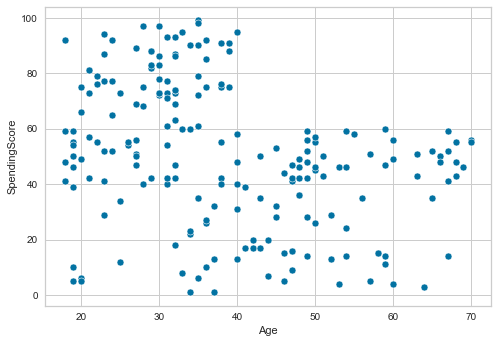

In [25]:
sns.scatterplot( x , y)

In [26]:
x = mall_df.AnnualIncome

C:\Users\edenl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AnnualIncome', ylabel='SpendingScore'>

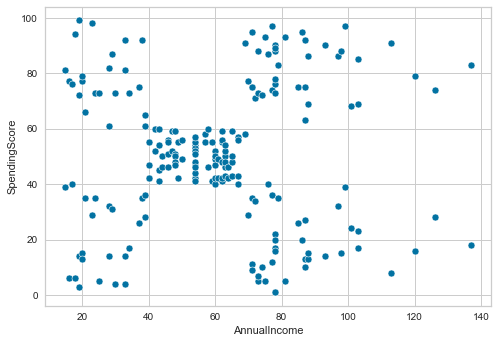

In [27]:
sns.scatterplot( x , y)

# PCA

In [28]:
pca = PCA(n_components=2)
pca.fit(mall_df)

PCA(n_components=2)

In [29]:
pca.explained_variance_ratio_

array([0.81899053, 0.14169335])

In [30]:
pca.singular_values_

array([893.80914289, 371.77492231])

In [31]:
#this pca helps a lot ! to get a better score on kmeans 
#i did without the pca before and only had 1,16 

# KMEANS

In [32]:
km = KMeans(n_clusters=2 , random_state=0).fit(mall_df)
km

KMeans(n_clusters=2, random_state=0)

In [33]:
km.predict(mall_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [34]:
score = silhouette_score(mall_df,km.labels_ , metric='euclidean' )
score

0.47934627465976204

# KELBOW VISUALIZER

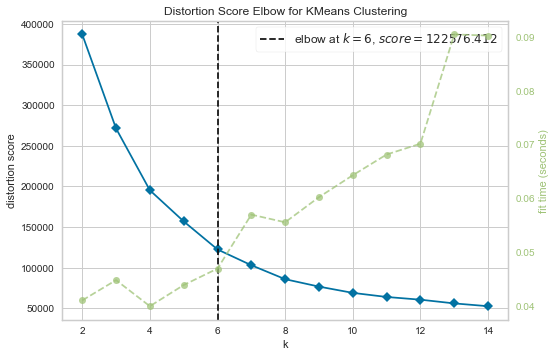

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
visualizer = KElbowVisualizer(km, k =(2,15))
visualizer.fit(mall_df)
visualizer.show()

# AGGLOMERATIVE CLUSTERING

In [37]:
ac = AgglomerativeClustering().fit(mall_df)
ac

AgglomerativeClustering()

In [38]:
ac.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [39]:
score_agglo = AgglomerativeClustering(mall_df)
score_agglo

AgglomerativeClustering(n_clusters=     CustomerID  Age  AnnualIncome  SpendingScore
0             1   19            15             39
1             2   21            15             81
2             3   20            16              6
3             4   23            16             77
4             5   31            17             40
..          ...  ...           ...            ...
195         196   35           120             79
196         197   45           126             28
197         198   32           126             74
198         199   32           137             18
199         200   30           137             83

[200 rows x 4 columns])

# GAUSSIAN MIXTURE

In [40]:
gm = GaussianMixture(n_components=2, random_state=0).fit(mall_df)
gm.means_

array([[179.69921505,  34.2980807 ,  97.99282482,  58.12001951],
       [ 83.75691043,  39.81229732,  52.64652335,  48.52567032]])

In [41]:
gm.predict(mall_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# AFFINITY PROPAGATION

In [42]:
ap = AffinityPropagation(random_state=5).fit(mall_df)
ap

AffinityPropagation(random_state=5)

In [43]:
ap.labels_

array([ 0,  2,  0,  2,  0,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  0,
        2,  1,  2,  0,  2,  1,  2,  1,  2,  0,  2,  0,  2,  1,  2,  1,  2,
        1,  2,  1,  2,  1,  2,  1,  2,  3,  3,  1,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  3,  3,  4,  4,  3,  4,  4,  3,  4,  4,  4,  3,  4,  4,
        3,  3,  4,  4,  4,  4,  4,  5,  4,  4,  5,  4,  4,  5,  4,  4,  5,
        4,  4,  5,  5,  6,  4,  5,  6,  5,  5,  5,  6,  5,  6,  5,  5,  6,
        6,  5,  6,  5,  6,  6,  6,  6,  6,  5,  6,  5,  5,  5,  6,  6,  6,
        6,  5,  6,  6,  7,  8,  7,  6,  7,  8,  7,  8,  7,  8,  7,  8,  7,
        8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,
        7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  9,  8,  9,  8,  9,
        8,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [44]:
ap.predict(mall_df)

array([ 0,  2,  0,  2,  0,  2,  1,  2,  1,  2,  1,  2,  1,  2,  1,  2,  0,
        2,  1,  2,  0,  2,  1,  2,  1,  2,  0,  2,  0,  2,  1,  2,  1,  2,
        1,  2,  1,  2,  1,  2,  1,  2,  3,  3,  1,  3,  3,  3,  3,  3,  3,
        3,  3,  4,  3,  3,  4,  4,  3,  4,  4,  3,  4,  4,  4,  3,  4,  4,
        3,  3,  4,  4,  4,  4,  4,  5,  4,  4,  5,  4,  4,  5,  4,  4,  5,
        4,  4,  5,  5,  6,  4,  5,  6,  5,  5,  5,  6,  5,  6,  5,  5,  6,
        6,  5,  6,  5,  6,  6,  6,  6,  6,  5,  6,  5,  5,  5,  6,  6,  6,
        6,  5,  6,  6,  7,  8,  7,  6,  7,  8,  7,  8,  7,  8,  7,  8,  7,
        8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,
        7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  7,  8,  9,  8,  9,  8,  9,
        8,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [45]:
ap.cluster_centers_

array([[ 17,  35,  21,  35],
       [ 25,  54,  28,  14],
       [ 26,  29,  28,  82],
       [ 53,  31,  43,  54],
       [ 73,  60,  50,  49],
       [ 98,  27,  60,  50],
       [108,  54,  63,  46],
       [144,  32,  76,  87],
       [151,  43,  78,  17],
       [182,  32,  97,  86],
       [189,  41, 103,  17]], dtype=int64)

# Conclusions